# Определение перспективного тарифа для телеком-компании

Компания "Мегалайн" предлагает 2 тарифных плана: "Смарт" и "Ультра". Для корректировки рекламного бюджета коммерческий департамент хочет понять, какой тариф приносит больше денег. Задача - произвести предварительный анализ на небольшой выборке клиентов. 

В моем распоряжении - данные 500 пользователей "Мегалайна". На основе них необходимо произвести анализ поведения клиентов и определить, какой тариф лучше.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a 
href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типа-данных-и-удаление-ошибок" data-toc-modified-id="Замена-типа-данных-и-удаление-ошибок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена типа данных и удаление ошибок</a></span></li><li><span><a href="#Расчеты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчеты-и-добавление-результатов-в-таблицу-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Расчеты и добавление результатов в таблицу</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a

## Изучение данных из файла 

Импортируем библиотеку pandas и последовательно прочитаем каждый из файлов. Поскольку в блоке анализа мы будем работать с выборкой, и одной из задач будет построение гистограммы, то импортируем и библиотеки, которые позволят сделать это, т.е. numpy и matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Таблица с информацией о звонках 

In [2]:
calls=pd.read_csv('/datasets/calls.csv')
display(calls.head())
calls.info()
print(calls.isna().sum())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
id           0
call_date    0
duration     0
user_id      0
dtype: int64


В датафрейме calls содержится информация о звонках каждого пользователя. Пропуски отсутствуют. Согласно документации к данным:

* **id** — уникальный номер звонка;
* **call_date** — дата звонка;
* **duration** — длительность звонка в минутах;
* **user_id** — идентификатор пользователя, сделавшего звонок.

Данные в столбцах представлены в форматах object, float и int.

Мы знаем, что "0" в столбце **duration** - пропущенные звонки ("абонент временно не доступен", "абонент разговаривает по другой линии", адресат просто не взял трубку и тд.). Таковые значения не являются ошибочными, потому удалять их мы не будем.

**Вывод**

В блоке предобработки данных будет необходимо перевести данные столбца **call_date** в формате datetime. Также будет необходимо округлить до целого в большую сторону значения в столбце **duration**. После этих преобразований необходимо будет добавить столбцы с количеством звонков и потраченных минут по месяцам для каждого пользователя.

### Таблица с информацией об объемах интернет-трафика

In [3]:
net=pd.read_csv('/datasets/internet.csv')
display(net.head())
net.info()
print(net.isna().sum())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


В датафрейме net содержится информация об объемах интернет-трафика каждого пользователя. Пропуски отсутствуют. Столбец **Unnamed:0** не несет какой-либо полезной информации, а лишь дублирует индексацию по строкам таблицы, потому от него мы избавимся в блоке предобработки. Согласно документации к данным:

* **id** — уникальный номер сессии;
* **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах);
* **session_date** — дата интернет-сессии;
* **user_id** — идентификатор пользователя;

Данные представлены в форматах object, float и int. 

**Вывод**

Аналогично датафрейму calls, необходимо перевести столбец **session_date** к формату datetime, а столбец mb_used - перевести в гигабайты и округлить до целого в большую сторону. В последствии посчитаем, сколько пользователь использовал трафика по месяцам

### Таблица с информацией о сообщениях

In [4]:
messages=pd.read_csv('/datasets/messages.csv')
display(messages.head())
messages.info()
print(messages.isna().sum())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
id              0
message_date    0
user_id         0
dtype: int64


В датафрейме messages содержится информация об отправленных сообщениях пользователей. Пропуски отсутствуют. Согласно документации:

* **id** — уникальный номер сообщения;
* **message_date** — дата сообщения;
* **user_id** — идентификатор пользователя, отправившего сообщение

Данные представлены в форматах object и int.

**Вывод**

Необходимо перевести данные в **message_date** к формату datetime. Впоследствии посчитаем, сколько каждый пользователь отправляет сообщений по месяцам

### Таблица с информацией о тарифах

In [5]:
tariffs=pd.read_csv('/datasets/tariffs.csv')
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод**

Датафрейм tarriffs уже готов для дальнейшей работы с ним. Согласно документации к данным:

* **tariff_name** — название тарифа;
* **rub_monthly_fee** — ежемесячная абонентская плата в рублях;
* **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату;
* **messages_included** — количество сообщений в месяц, включённых в абонентскую плату;
* **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета;
* **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

### Таблица с информацией о пользователях

In [6]:
users=pd.read_csv('/datasets/users.csv')
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В датафрейме **users** много пропусков в столбце **churn_date**, однако смущать они нас не должны. Они свидетельствуют о том, что лишь 38 пользователей прекратили обслуживание, а остальные являются текущими пользователями "Мегалайна". Столбцы содержат следующую информацию:

* **user_id** — уникальный идентификатор пользователя;
* **first_name** — имя пользователя;
* **last_name** — фамилия пользователя;
* **age** — возраст пользователя (годы);
* **reg_date** — дата подключения тарифа (день, месяц, год);
* **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* **city** — город проживания пользователя;
* **tarif** — название тарифного планаю

Необходимо преобразовать данные в столбцах churn_date и reg_date к формату datetime.

**Вывод к главе**

В 4 из 5 датафреймов нужно заменить тип данных с object на datetime. Однако, если мы будем считать датой оплаты дни, "кратные" дню регистрации (Например, день регистрации - 25.05. Значит, плата снимается ежемесячно 25-го числа) - это сильно усложнит наши расчеты, ибо у каждого пользователя они разные. Потому произведем допущение - пусть плата снимается первого числа каждого месяца - это упростит нам расчеты.

Перейдем к блоку предобработки данных!

## Предобработка данных

### Замена типа данных и удаление ошибок

Приведем нужные нам столбцы таблиц к формату datetime:

In [7]:
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
net['session_date']=pd.to_datetime(net['session_date'], format='%Y-%m-%d')
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Поскольку быборка представлена за 2018 год, мы можем заменить пропуски в users['churn_date'] на последний день 2018 года и перевести все значения также к формату datetime:

In [8]:
users['churn_date']=users['churn_date'].fillna('2018-12-31')
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Теперь добавим столбец, в котором будет зафиксирован месяц звонка/сообщения/выхода в интернет:

In [9]:
calls['month']=calls['call_date'].dt.month
net['month']=net['session_date'].dt.month
messages['month']=messages['message_date'].dt.month

Переведем calls['duration'] в целые с округлением в большую сторону:

In [10]:
calls['duration'] =  np.ceil(calls['duration']).astype('int')
display(calls.head(10))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


Как мы можем заметить, у нас есть нули в столбцах net['mb_used'] и calls['duration]. Если бы было необходимо найти среднюю продолжительность звонка, например, то такие данные бы мешали нам. Но нам нужно оценить лишь суммарное количество минут и мегабайт в месяц, на которые прибавление нулевых значений никак не повлияет. А вот столбец net['Unnamed:0'] стоит удалить:

In [11]:
net.drop('Unnamed: 0', axis=1, inplace=True)

**Вывод**

Данные приведены к необходимому формату. Ошибочный столбец удален.

### Расчеты и добавление результатов в таблицу

Для начала рассчитаем необходимые для исследования параметры для каждого исходного датафрейма, а потом объединим их в исходную таблицу:

In [12]:
calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
calls.columns = ['count_calls', 'sum_duration']
display(calls)

count_calls  sum_duration
user_id month                           
1000    5               22           159
        6               43           172
        7               47           340
        8               52           408
        9               58           466
...                    ...           ...
1498    10              41           247
1499    9                9            70
        10              68           449
        11              74           612
        12              69           492

[3174 rows x 2 columns]

In [13]:
messages = messages.groupby(['user_id', 'month'])['id'].count()
display(messages)

user_id  month
1000     5        22
         6        60
         7        75
         8        81
         9        57
                  ..
1498     10       42
1499     9        11
         10       48
         11       59
         12       66
Name: id, Length: 2717, dtype: int64

In [14]:
net = net.groupby(['user_id', 'month'])['mb_used'].agg('sum')
display(net)

user_id  month
1000     5         2253.49
         6        23233.77
         7        14003.64
         8        14055.93
         9        14568.91
                    ...   
1498     10       20579.36
1499     9         1845.75
         10       17788.51
         11       17963.31
         12       13055.58
Name: mb_used, Length: 3203, dtype: float64

Объединим последовательно таблицы calls, net, messages:

In [15]:
df = pd.concat([calls, messages, net], axis=1)
df = df.reset_index()
display(df)

,user_id,month,count_calls,sum_duration,id,mb_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20579.36
3210,1499,9,9.0,70.0,11.0,1845.75
3211,1499,10,68.0,449.0,48.0,17788.51
3212,1499,11,74.0,612.0,59.0,17963.31


Данные в столбце ['mb_used'] представлены в мегабайт, но нам известно, что "Мегалайн" округляет до гигабайт в большую сторону. Сделаем это и мы:

In [16]:
def mega_to_giga(row):
    mega=row['mb_used']
    if mega>0:
        giga = (np.ceil(mega/1024.0)).astype('int')
        return giga
    else:
        return 0
df['mb_used'] = df.apply(mega_to_giga, axis=1)
df.rename(columns={'mb_used':'gb_used'}, inplace=True)
display(df)

,user_id,month,count_calls,sum_duration,id,gb_used
0,1000,5,22.0,159.0,22.0,3
1,1000,6,43.0,172.0,60.0,23
2,1000,7,47.0,340.0,75.0,14
3,1000,8,52.0,408.0,81.0,14
4,1000,9,58.0,466.0,57.0,15
...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21
3210,1499,9,9.0,70.0,11.0,2
3211,1499,10,68.0,449.0,48.0,18
3212,1499,11,74.0,612.0,59.0,18


Теперь добавим к таблице столбец с названием тарифа пользователя:

In [17]:
df = df.merge(users[['user_id','tariff']], on='user_id')
df.rename(columns={'tariff':'tariff_name'}, inplace=True)
display(df)

,user_id,month,count_calls,sum_duration,id,gb_used,tariff_name
0,1000,5,22.0,159.0,22.0,3,ultra
1,1000,6,43.0,172.0,60.0,23,ultra
2,1000,7,47.0,340.0,75.0,14,ultra
3,1000,8,52.0,408.0,81.0,14,ultra
4,1000,9,58.0,466.0,57.0,15,ultra
...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21,smart
3210,1499,9,9.0,70.0,11.0,2,smart
3211,1499,10,68.0,449.0,48.0,18,smart
3212,1499,11,74.0,612.0,59.0,18,smart


добавим цену столбец со стандартной ценой тарифа:

In [18]:
df = df.merge(tariffs[['tariff_name','rub_monthly_fee']], on='tariff_name')
display(df)

,user_id,month,count_calls,sum_duration,id,gb_used,tariff_name,rub_monthly_fee
0,1000,5,22.0,159.0,22.0,3,ultra,1950
1,1000,6,43.0,172.0,60.0,23,ultra,1950
2,1000,7,47.0,340.0,75.0,14,ultra,1950
3,1000,8,52.0,408.0,81.0,14,ultra,1950
4,1000,9,58.0,466.0,57.0,15,ultra,1950
...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21,smart,550
3210,1499,9,9.0,70.0,11.0,2,smart,550
3211,1499,10,68.0,449.0,48.0,18,smart,550
3212,1499,11,74.0,612.0,59.0,18,smart,550


Теперь посчитаем помесячную выручку с каждого пользователя:

In [28]:
df.shape

(3214, 9)

In [30]:
df.user_id.nunique()

498

In [19]:
def give_me_your_sms(row):   #функция для подсчета превышения лимита смс
    tariff = row['tariff_name']
    sms = row['id']
    if tariff == 'smart':
        price = 550
        if sms > 50:
            price += (sms-50)*3
            return price
        else:
            return price
    if tariff == 'ultra':
        price = 1950
        if sms > 1000:
            price += (sms-50)*1
            return price
        else:
            return price
            
df['rub_monthly_fee']=df.apply(give_me_your_sms, axis=1)

def give_me_your_gb(row):  #функция для подсчета превышения трафика в гб
    tariff = row['tariff_name']
    gb = row['gb_used']
    price = row['rub_monthly_fee']
    if tariff == 'smart':
        if gb > 15:
            price += (gb-15)*200
            return price
        else:
            return price
    if tariff == 'ultra':
        price = 1950
        if gb > 30:
            price += (gb-30)*150
            return price
        else:
            return price
        
df['rub_monthly_fee']=df.apply(give_me_your_gb, axis=1)

def give_me_your_min(row):  #функция для подсчета превышения минут разговора
    tariff = row['tariff_name']
    duration = row['sum_duration']
    price = row['rub_monthly_fee']
    if tariff == 'smart':
        if duration > 500:
            price += (duration-500)*3
            return price
        else:
            return price
    if tariff == 'ultra':
        if duration > 3000:
            price += (duration-3000)*1
            return price
        else:
            return price
        
df['rub_monthly_fee']=df.apply(give_me_your_min, axis=1)
df = df.fillna(0) #заменим вс пропуски нашей таблицы на нули
display(df)

,user_id,month,count_calls,sum_duration,id,gb_used,tariff_name,rub_monthly_fee
0,1000,5,22.0,159.0,22.0,3,ultra,1950.0
1,1000,6,43.0,172.0,60.0,23,ultra,1950.0
2,1000,7,47.0,340.0,75.0,14,ultra,1950.0
3,1000,8,52.0,408.0,81.0,14,ultra,1950.0
4,1000,9,58.0,466.0,57.0,15,ultra,1950.0
...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21,smart,1750.0
3210,1499,9,9.0,70.0,11.0,2,smart,550.0
3211,1499,10,68.0,449.0,48.0,18,smart,1150.0
3212,1499,11,74.0,612.0,59.0,18,smart,1513.0


**Вывод**

В ходе выполнения данной главы были рассчитаны необходимые параметры для дальнейшего анализа данных, а именно: количество сделанных звонков и израсходованные минуты, отправленные сообщения и израсходованный интернет-трафик каждого пользователя по месяцам. Также была рассчитана помесячная выручка с каждого пользователя

In [31]:
df['rub_monthly_fee'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: rub_monthly_fee, dtype: float64

## Анализ данных

Нам необходимо описать поведение клиентов оператора в зависимости от выбранного тарифа. Разобьем наш датафрейм на два других, в одном из которых будет информация о пользователях тарифа "ultra", а в другом - "smart":

In [20]:
df_ultra = df[df['tariff_name'] == 'ultra']
df_smart = df[df['tariff_name'] == 'smart']

В данном случае нам предстоит работа с выборками. Потому считать мы будем не саму дисперсию, а ее оценку:

Smart. Среднее количество минут разговора в месяц: 417.9349484073576
Smart. Дисперсия: 36219.31578434428
Smart. Стандартное отклонение: 190.31372988921288
Ultra. Среднее количество минут разговора в месяц: 526.6233502538071
Ultra. Дисперсия: 100873.63339730098
Ultra. Стандартное отклонение: 317.6060978591264


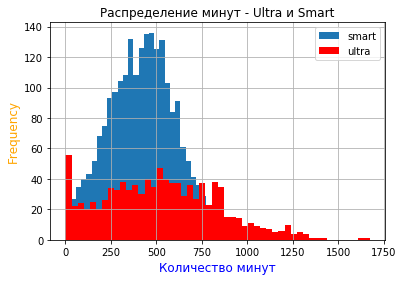

In [21]:
smart_min_mean = np.mean(df_smart['sum_duration'])
smart_min_dispersion = np.var(df_smart['sum_duration'], ddof=1)
smart_min_std = np.std(df_smart['sum_duration'], ddof=1)
df_smart['sum_duration'].plot(kind='hist', bins=50, label='smart', legend=True, grid = True)
ax = plt.gca()
ax.set_xlabel("Количество минут", fontsize=12, color='blue')
ax.set_ylabel("Частота", fontsize=12, color='orange')
print('Smart. Среднее количество минут разговора в месяц:', smart_min_mean)
print('Smart. Дисперсия:', smart_min_dispersion)
print('Smart. Стандартное отклонение:', smart_min_std)
ultra_min_mean = np.mean(df_ultra['sum_duration'])
ultra_min_dispersion = np.var(df_ultra['sum_duration'], ddof=1)
ultra_min_std = np.std(df_ultra['sum_duration'], ddof=1)
df_ultra['sum_duration'].plot(kind='hist', bins=50, title = 'Распределение минут - Ultra и Smart', label='ultra', legend=True, color = 'red', grid = True)
print('Ultra. Среднее количество минут разговора в месяц:', ultra_min_mean)
print('Ultra. Дисперсия:', ultra_min_dispersion)
print('Ultra. Стандартное отклонение:', ultra_min_std)

Smart. Среднее количество гигабайт в месяц: 16.328847016599372
Smart. Дисперсия: 33.02870517811161
Smart. Стандартное отклонение: 5.7470605685090534
Ultra. Среднее количество гигабайт в месяц: 19.494416243654822
Ultra. Дисперсия: 97.09168626965459
Ultra. Стандартное отклонение: 9.853511367510293


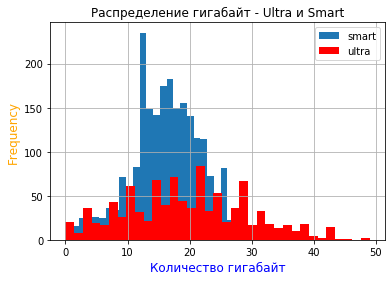

In [22]:
smart_gb_mean = np.mean(df_smart['gb_used'])
smart_gb_dispersion = np.var(df_smart['gb_used'], ddof=1)
smart_gb_std = np.std(df_smart['gb_used'], ddof=1)
df_smart['gb_used'].plot(kind='hist', bins=35, label='smart', legend=True, grid = True)
ax = plt.gca()
ax.set_xlabel("Количество гигабайт", fontsize=12, color='blue')
ax.set_ylabel("Частота", fontsize=12, color='orange')
print('Smart. Среднее количество гигабайт в месяц:', smart_gb_mean)
print('Smart. Дисперсия:', smart_gb_dispersion)
print('Smart. Стандартное отклонение:', smart_gb_std)
ultra_gb_mean = np.mean(df_ultra['gb_used'])
ultra_gb_dispersion = np.var(df_ultra['gb_used'], ddof=1)
ultra_gb_std = np.std(df_ultra['gb_used'], ddof=1)
df_ultra['gb_used'].plot(kind='hist', bins=35, title = 'Распределение гигабайт - Ultra и Smart', color = 'red', label='ultra', legend=True, grid = True)
print('Ultra. Среднее количество гигабайт в месяц:', ultra_gb_mean)
print('Ultra. Дисперсия:', ultra_gb_dispersion)
print('Ultra. Стандартное отклонение:', ultra_gb_std)

Smart. Среднее количество сообщений в месяц: 33.384028712427096
Smart. Дисперсия: 796.8129584480083
Smart. Стандартное отклонение: 28.22787555676141
Ultra. Среднее количество сообщений в месяц: 49.36345177664975
Ultra. Дисперсия: 2285.266142544674
Ultra. Стандартное отклонение: 47.80445735017472


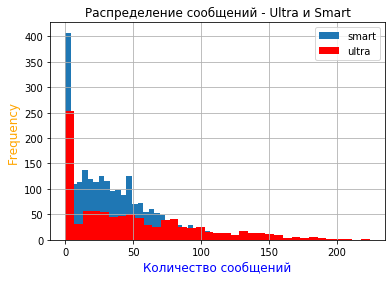

In [23]:
smart_sms_mean = np.mean(df_smart['id'])
smart_sms_dispersion = np.var(df_smart['id'], ddof=1)
smart_sms_std = np.std(df_smart['id'], ddof=1)
df_smart['id'].plot(kind='hist', bins=35, label='smart', legend=True, grid = True)
ax = plt.gca()
ax.set_xlabel("Количество сообщений", fontsize=12, color='blue')
ax.set_ylabel("Частота", fontsize=12, color='orange')
print('Smart. Среднее количество сообщений в месяц:', smart_sms_mean)
print('Smart. Дисперсия:', smart_sms_dispersion)
print('Smart. Стандартное отклонение:', smart_sms_std)
ultra_sms_mean = np.mean(df_ultra['id'])
ultra_sms_dispersion = np.var(df_ultra['id'], ddof=1)
ultra_sms_std = np.std(df_ultra['id'], ddof=1)
df_ultra['id'].plot(kind='hist', bins=35, title = 'Распределение сообщений - Ultra и Smart', color = 'red', label='ultra', legend=True, grid = True)
print('Ultra. Среднее количество сообщений в месяц:', ultra_sms_mean)
print('Ultra. Дисперсия:', ultra_sms_dispersion)
print('Ultra. Стандартное отклонение:', ultra_sms_std)

**Вывод**

Распределения трафика и минут разговора близки к нормальным; сообщений - к распределению Пуассона. Однако во всех случаях, графики для ultra имеют большее значение стандартного отклонения, за счет чего гистограммы получаются более "пологими"

Несмотря на то, что в тариф Ultra включено 3000 минут разговора, количество пользователей, использоваших хотя бы половину из этого лимита, крайне мало (по правилу трех сигм - верхняя граница составляет около 1500 минут). В случае же Smart'a: превышение лимита в 500 минут - распространенная ситуация.

Большинство пользователей Ultra расходуют не больше гигабайт, чем включено в тариф. При этом, выход за пределы 30 Гб не является редкостью. В случае пользователей Smart: среднее превышает включенный тарифный план, потому на основе данной выборки можно сказать, что около половины пользователей доплачивают за продление трафика.

Ситуация с сообщениями аналогична ситуации с минутами для пользователей тарифа Ultra - в подавляющем большинстве пользователи не пишут более 200 сообщений в месяц и, следовательно, лимита в 1000 - более, чем достаточно. Пользователи Smart более, чем в половине случаев укладываются в тарифный план, но и достаточно часто выходят за его предел.

## Проверка гипотез

### Средняя выручка пользователей тарифов Smart и Ultra различается

Сформулируем гипотезы:

* Нулевая гипотеза - средняя выручка пользвателей двух тарифов не различается;
* Альтернативная - средняя выручка пользователей двух тарифов различается.

Как мы значем из предыдущей главы, пользователям Smart чаще не было достаточно лимитов, чем пользователям Ultra, потому дисперсия цены у интересующих нас массивов будет отличаться. При проведении t-теста зададим параметр equal_var=False

In [24]:
from scipy import stats as st
alpha = 0.05 #зададим критический уровень значимости
result = st.ttest_ind(df_ultra['rub_monthly_fee'], df_smart['rub_monthly_fee'], equal_var=False)
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод**

Нулевая гипотеза о равенстве средней выручки пользователей тарифов Smart и Ultra отвергнута. Таким образом, альтернативная гипотеза о различии средних выручек не отвергается.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Добавим в наш датафрейм (полученный в результате действий во второй главе) столбец с городом пользователя:

In [25]:
df = df.merge(users[['user_id','city']], on='user_id')
display(df) #выведем его на экран

,user_id,month,count_calls,sum_duration,id,gb_used,tariff_name,rub_monthly_fee,city
0,1000,5,22.0,159.0,22.0,3,ultra,1950.0,Краснодар
1,1000,6,43.0,172.0,60.0,23,ultra,1950.0,Краснодар
2,1000,7,47.0,340.0,75.0,14,ultra,1950.0,Краснодар
3,1000,8,52.0,408.0,81.0,14,ultra,1950.0,Краснодар
4,1000,9,58.0,466.0,57.0,15,ultra,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21,smart,1750.0,Владикавказ
3210,1499,9,9.0,70.0,11.0,2,smart,550.0,Пермь
3211,1499,10,68.0,449.0,48.0,18,smart,1150.0,Пермь
3212,1499,11,74.0,612.0,59.0,18,smart,1513.0,Пермь


Разделим его на 2 новых датафрейма: в одном будут пользователи из Москвы, во втором - не из Москвы:

In [26]:
df_capital = df[df['city'] == 'Москва']
df_province = df[df['city'] != 'Москва']

Теперь сформулируем гипотезы:

* Нулевая гипотеза - средняя выручка москвичей не отличается от выручки пользователей из других городов
* Альтернативная гипотеза - средняя выручка москвичей отличается от выручки пользователей из других городов

Для точности исследования зададим equal_var=False

In [27]:
alpha = 0.05 #зададим критический уровень значимости
result = st.ttest_ind(df_capital['rub_monthly_fee'], df_province['rub_monthly_fee'], equal_var=False)
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод**

P-значение оказалось выше критического уровня значимости и составило 0,53. Таким образом, нулевая гипотеза о равенстве средней выручки столичных пользвателей и пользователей из других городов не отвергнута. Альтернативная же - отвергнута.

## Общий вывод

В ходе выполнения работы были исследованы 5 датафреймов с информацией о пользователях телеком-компании "Мегалайн". Далее были произведены определенные математические расчеты, после чего интересующие нас значения были добавлены в новый датафрейм. На основе данных новой таблицы были построены гистограммы, определены средние, дисперсии и стандартные отклонения требуемых величин. 

После была произведена проверка гипотез. Мы отвергли гипотезу о том, что средние выручки пользователей разных тарифов не отличаются, и не отвергли гипотезу о равенстве средних выручек пользователей из Москвы и других городов.